In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace import exponential_smoothing
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.api import STLForecast


/Users/julius/repos/AFC/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
from utils import *

In [3]:
data = Data()

In [4]:
models = ["autoarima", "prophet", "tbats"]
forecast_path = "forecast_pickles/"
most_recent_pickles = {model: get_most_recent_pickle_that_starts_with(model, forecast_path) for model in models }

In [5]:
most_recent_pickles

{'autoarima': 'autoarima_forecast.pkl',
 'prophet': 'prophet_20231221143051.pkl',
 'tbats': 'tbats_forecast.pkl'}

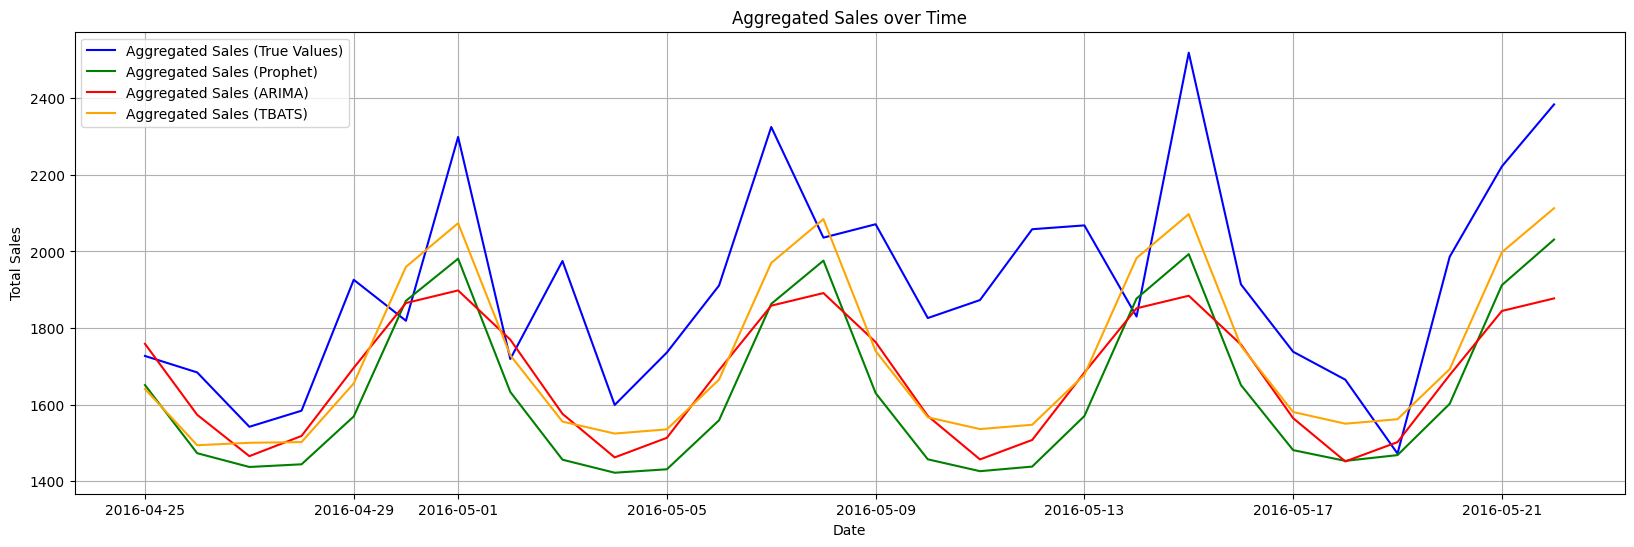

In [6]:
# Function to load the forecast from a pickle file
def load_forecast(model, forecast_path):
    filename = most_recent_pickles[model]
    pickle_file = f"{forecast_path}/{filename}"
    with open(pickle_file, 'rb') as f:
        forecast = pickle.load(f)
    return forecast

# Load forecasts for each model
prophet_forecast = load_forecast("prophet", forecast_path)
autoarima_forecast = load_forecast("autoarima", forecast_path)
tbats_forecast = load_forecast("tbats", forecast_path)
# Load other forecasts as needed

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(data.daily_sales_test.index, data.daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(data.daily_sales_test.index, prophet_forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.plot(data.daily_sales_test.index, autoarima_forecast.values, label='Aggregated Sales (ARIMA)', color='red')
plt.plot(data.daily_sales_test.index, tbats_forecast, label='Aggregated Sales (TBATS)', color='orange')
# Add plots for other forecasts as needed
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()